## Import Required Libraries

In [2]:
# Import the requests library to make HTTP requests
import requests

# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for support of multi-dimensional arrays and matrices
import numpy as np

# Import the datetime library for date representation
import datetime

# Set the maximum number of columns to display in pandas dataframes
pd.set_option('display.max_columns', None)

# Set the maximum width of a column in pandas dataframes
pd.set_option('display.max_colwidth', None)


In [3]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

In [4]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
        Longitude.append(response['longitude'])
        Latitude.append(response['latitude'])
        LaunchSite.append(response['name'])

In [5]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

In [6]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [8]:
spacex_url="https://api.spacexdata.com/v4/launches/past"
response = requests.get(spacex_url)

In [9]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'
response.status_code

200

In [12]:
# Use json_normalize meethod to convert the json result into a dataframe
jlist = requests.get(static_json_url).json()
df2 = pd.json_normalize(jlist)
df2.head()

,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png,https://images2.imgbox.com/40/e3/GypSkayF_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png,https://images2.imgbox.com/be/e7/iNqsqVYM_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/3d/86/cnu0pan8_o.png,https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,True,"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,True,[],4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_succes

In [13]:
df = pd.read_json(static_json_url)
# Get the head of the dataframe
df.head()

,fairings,links,static_fire_date_utc,static_fire_date_unix,tbd,net,window,rocket,success,details,crew,ships,capsules,payloads,launchpad,auto_update,failures,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,id
0,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/3c/0e/T8iJcSN3_o.png', 'large': 'https://images2.imgbox.com/40/e3/GypSkayF_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=0a_00nJ_Y88', 'youtube_id': '0a_00nJ_Y88', 'article': 'https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",2006-03-17T00:00:00.000Z,1.142554e+09,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,True,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cd9ffd86e000604b32a
1,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/4f/e3/I0lkuJ2e_o.png', 'large': 'https://images2.imgbox.com/be/e7/iNqsqVYM_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=Lk4zQ2wP-Nc', 'youtube_id': 'Lk4zQ2wP-Nc', 'article': 'https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html', 'wikipedia': 'https://en.wikipedia.org/wiki/DemoSat'}",None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,"Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,True,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]",2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdaffd86e000604b32b
2,"{'reused': False, 'recovery_attempt': False, 'recovered': False, 'ships': []}","{'patch': {'small': 'https://images2.imgbox.com/3d/86/cnu0pan8_o.png', 'large': 'https://images2.imgbox.com/4b/bd/d8UxLh4q_o.png'}, 'reddit': {'campaign': None, 'launch': None, 'media': None, 'recovery': None}, 'flickr': {'small': [], 'original': []}, 'presskit': None, 'webcast': 'https://www.youtube.com/watch?v=v0w9p3U8860', 'youtube_id': 'v0w9p3U8860', 'article': 'http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary', 'wikipedia': 'https://en.wikipedia.org/wiki/Trailblazer_(satellite)'}",None,NaN,False,False,0.0,5e9d0d95eda69955f709d1eb,False,Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,True,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",5eb87cdbffd86e000604b32c
3,"{'reused': False, 'recovery_attempt': False, 'recovered': Fals

In [14]:
# Storing a copy of 'df' dataframe in 'data'
data = df

In [15]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [16]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [17]:
# Call getBoosterVersion
getBoosterVersion(data)

In [18]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [19]:
# Call getLaunchSite
getLaunchSite(data)

# Call getPayloadData
getPayloadData(data)

# Call getCoreData
getCoreData(data)

launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

# Create a data from launch_dict
data_falcon9 = pd.DataFrame(launch_dict)

# Show the head of the dataframe
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


## Filter the dataframe

In [20]:
# Hint data['BoosterVersion']!='Falcon 1'

# data_falcon9['BoosterVersion']!='Falcon 9' returns true for all rows except 'Falcon 9' and running drop, drops those rows. 
data_falcon9.drop(data_falcon9[data_falcon9['BoosterVersion']!='Falcon 9'].index, inplace = True)

In [21]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
90,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
91,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
92,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


## Data Wrangling

In [22]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

## Dealing with Missing Values

In [23]:
# Calculate the mean value of PayloadMass column
avg_payload_mass = data_falcon9["PayloadMass"].astype("float").mean(axis=0)
# Replace the np.nan values with its mean value
data_falcon9["PayloadMass"].replace(np.nan, avg_payload_mass, inplace=True)

In [24]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [25]:
data_falcon9.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
4,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
5,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
6,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
7,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
8,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857


In [27]:
data_falcon9.to_csv('csv/dataset.csv', index=False)

## Load CSV data 

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df_spaceX=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df_spaceX.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [64]:
df_spaceX.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

## Exploratory Data Analysis

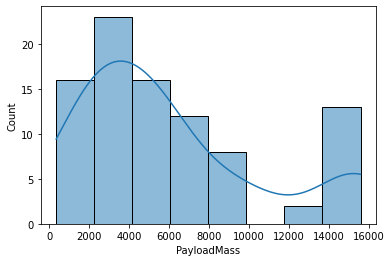

In [65]:
# Visualize the distribution of numerical columns
sns.histplot(data=df_spaceX, x='PayloadMass', kde=True)
plt.show()

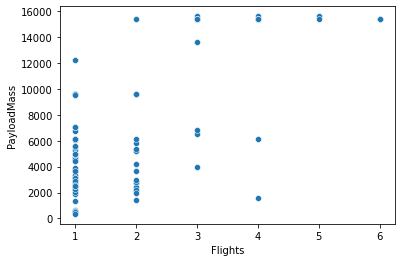

In [66]:
# Visualize the relationship between two numerical columns
sns.scatterplot(data=df_spaceX, x='Flights', y='PayloadMass')
plt.show()

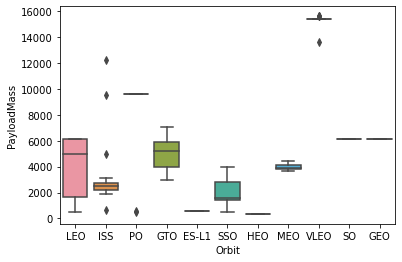

In [67]:
# Visualize the relationship between a categorical column and a numerical column
sns.boxplot(data=df_spaceX, x='Orbit', y='PayloadMass')
plt.show()

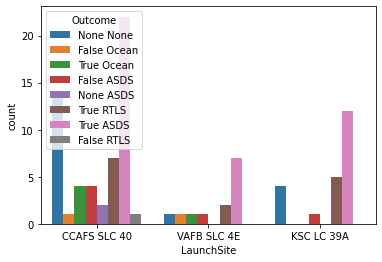

In [68]:
# Visualize the relationship between two categorical columns
sns.countplot(data=df_spaceX, x='LaunchSite', hue='Outcome')
plt.show()

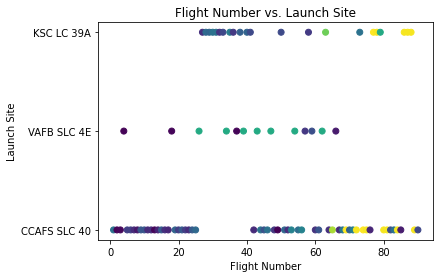

In [69]:
# Create a scatter plot of Flight Number vs. Launch Site
plt.scatter(df_spaceX['FlightNumber'], df_spaceX['LaunchSite'], c=df_spaceX['PayloadMass'])

# Add axis labels and a title
plt.xlabel('Flight Number')
plt.ylabel('Launch Site')
plt.title('Flight Number vs. Launch Site')

# Show the plot
plt.show()

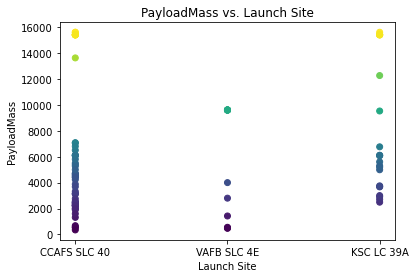

In [70]:
# Create a scatter plot of Payload vs. Launch Site
plt.scatter(df_spaceX['LaunchSite'], df_spaceX['PayloadMass'], c=df_spaceX['PayloadMass'])
# Add axis labels and a title
plt.xlabel('Launch Site')
plt.ylabel('PayloadMass')
plt.title('PayloadMass vs. Launch Site')

# Show the plot
plt.show()

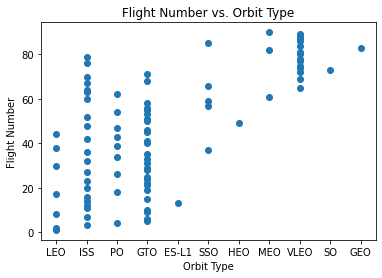

In [71]:
# Create a scatter plot of Flight number vs. Orbit type
plt.scatter(df_spaceX['Orbit'], df_spaceX['FlightNumber'])

# Add axis labels and a title
plt.xlabel('Orbit Type')
plt.ylabel('Flight Number')
plt.title('Flight Number vs. Orbit Type')

# Show the plot
plt.show()

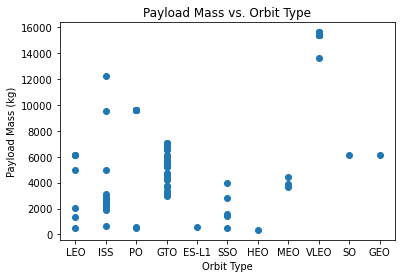

In [72]:
plt.scatter(df_spaceX['Orbit'], df_spaceX['PayloadMass'])

# Add axis labels and a title
plt.xlabel('Orbit Type')
plt.ylabel('Payload Mass (kg)')
plt.title('Payload Mass vs. Orbit Type')

# Show the plot
plt.show()

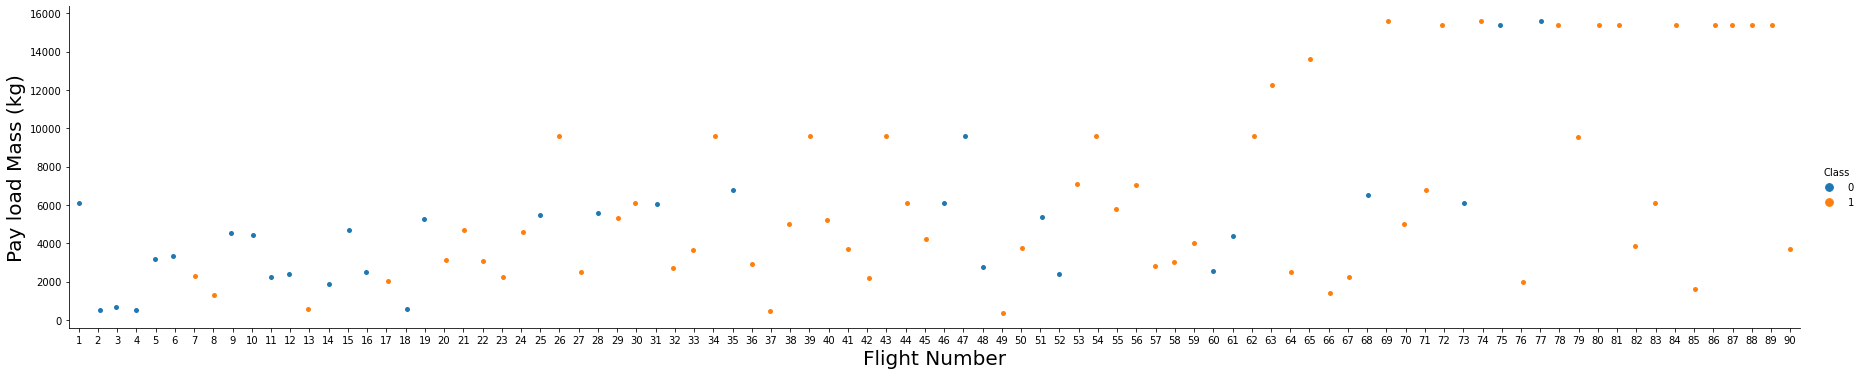

In [74]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df_spaceX, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

## Relationship between Flight Number and Launch Site

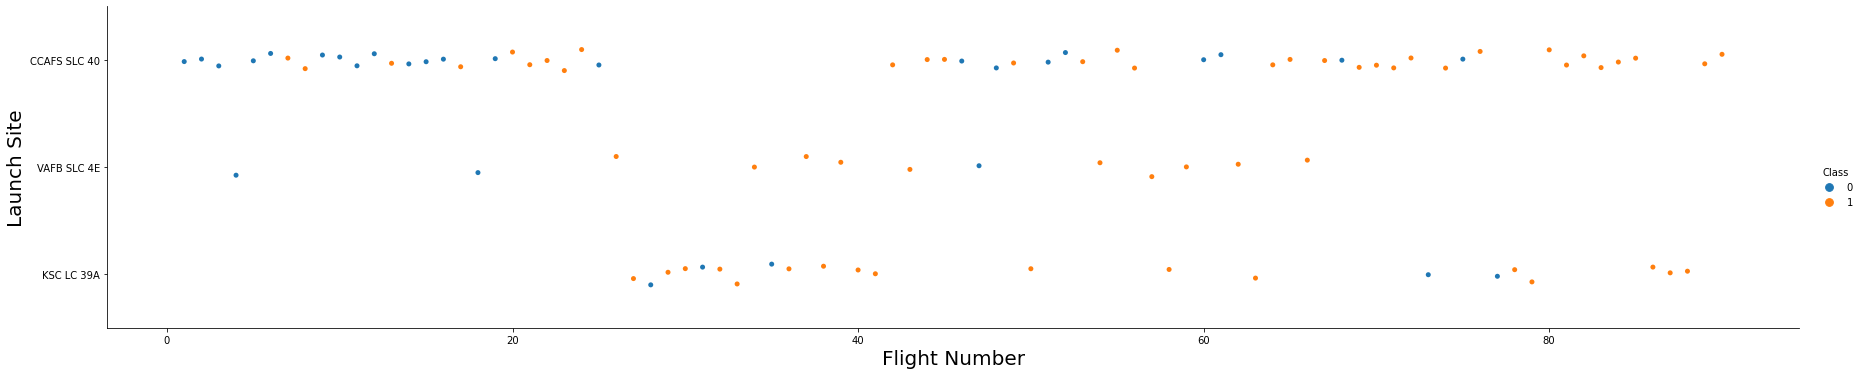

In [76]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df_spaceX, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()


## Relationship between Payload and Launch Site

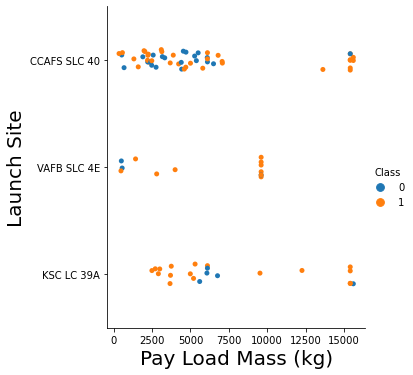

In [78]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df_spaceX)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

## Relationship between success rate of each orbit type

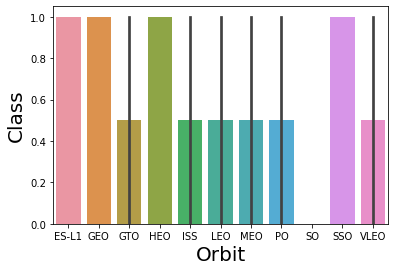

In [80]:
# HINT use groupby method on Orbit column and get the mean of Class column
t = df_spaceX.groupby(['Orbit', 'Class'])['Class'].agg(['mean']).reset_index()
sns.barplot(y="Class", x="Orbit", data=t)

plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Class",fontsize=20)
plt.show()

## Launch success yearly trend

In [84]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df_spaceX["Date"]:
        year.append(i.split("-")[0])
    return year

In [86]:
df=pd.DataFrame(Extract_year(df_spaceX['Date']),columns =['year'])
df['Class']=df_spaceX['Class']
df.head()

,year,Class
0,2010,0.0
1,2012,0.0
2,2013,0.0
3,2013,0.0
4,2013,0.0


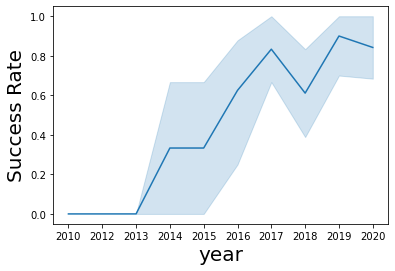

In [87]:
sns.lineplot(data=df1, x="year", y="Class")
plt.xlabel("year",fontsize=20)
plt.ylabel("Success Rate",fontsize=20)
plt.show()

## Feature Engineering 

In [89]:
features = df_spaceX[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [90]:
# HINT: Use get_dummies() function on the categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
# HINT: use astype function
features_one_hot.astype(float)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Predictive analysis methodology 

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [8]:
# Split the dataset into training and testing sets
X = df_spaceX[['PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount']]
y = df_spaceX['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
# Evaluate the model on the testing set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.4444444444444444


## Unique Launch Sites

In [54]:
unique_launch_sites = df_spaceX['LaunchSite'].unique()
print(unique_launch_sites)

['CCSFS SLC 40' 'VAFB SLC 4E' 'KSC LC 39A']


## Launch Site Names Begin with 'CC'

In [59]:
df_spaceX[df_spaceX['LaunchSite'].str.startswith('CC')].head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Year
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,2013
5,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1005,-80.577366,28.561857,2014


## Total Payload Mass

In [60]:
nasa_payload = df_spaceX.loc[df_spaceX['LaunchSite'].str.contains('CCAFS|KSC'), 'PayloadMass'].sum()
print("Total payload carried by boosters from NASA: {:.2f} kg".format(nasa_payload))

Total payload carried by boosters from NASA: 168179.10 kg


In [61]:
# Filter the dataframe to only include rows where BoosterVersion is F9 v1.1
df_f9_v1_1 = df_spaceX[df_spaceX['BoosterVersion'] == 'F9 v1.1']

# Calculate the mean of the PayloadMass column
avg_payload_mass = df_f9_v1_1['PayloadMass'].mean()

print("Average payload mass carried by F9 v1.1 boosters:", avg_payload_mass, "kg")

Average payload mass carried by F9 v1.1 boosters: nan kg


## Interactive map with Folium

In [92]:
import folium
# Create a map centered on the first launch site
m = folium.Map(location=[df_spaceX['Latitude'][0], df_spaceX['Longitude'][0]], zoom_start=5)

# Add markers for each launch site
for index, row in df_spaceX.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']], popup=row['LaunchSite']).add_to(m)

# Display the map
m.save('mymap.html')

## Plotly Dash dashboard

In [93]:
import folium
import wget
import pandas as pd

In [94]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [95]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

100% [................................................................................] 7710 / 7710

In [96]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

,Launch Site,Lat,Long
0,CCAFS LC-40,28.562302,-80.577356
1,CCAFS SLC-40,28.563197,-80.576820
2,KSC LC-39A,28.573255,-80.646895
3,VAFB SLC-4E,34.632834,-120.610745


In [97]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [98]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name

# Circle should be blue so changing color code from #d35400 to #2572e6
circle = folium.Circle(nasa_coordinate, radius=1000, color='#2572e6', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [99]:
launch_sites_dict = launch_sites_df.set_index('Launch Site').T.to_dict('list')
launch_sites_dict

{'CCAFS LC-40': [28.56230197, -80.57735648],
 'CCAFS SLC-40': [28.56319718, -80.57682003],
 'KSC LC-39A': [28.57325457, -80.64689529],
 'VAFB SLC-4E': [34.63283416, -120.6107455]}

In [100]:
def add_marker_on_map(name, coordinate, circle_color='#d35400'):
    circle = folium.Circle(coordinate, radius=1000, color=circle_color, fill=True).add_child(folium.Popup(name))
    marker = folium.map.Marker(
        coordinate,
        icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html="<div style='font-size: 12; color:{};'><b>{}</b></div>". format(circle_color,name)
        )
    )
    site_map.add_child(circle)
    site_map.add_child(marker)
    
def add_text_distance_marker_on_map(name, coordinate, distance, ccolor='#4d0f1d'):
    txt="{}, {:0.2f} km".format(name, distance)
    folium.Marker(
    location=coordinate,
    icon=DivIcon(
            icon_size=(150,30),
            icon_anchor=(0,0),
            html='<div style="font-size: 9pt; font-weight:bold; color: {}">{}</div>'.format(ccolor, txt))
    ).add_to(site_map)

def add_type_marker_on_map(name, coordinate, ccolor='red', icon_type='train'):   
    marker = folium.map.Marker(
        location=coordinate, 
        popup=name,
        tooltip='click',
        icon=folium.Icon(color=ccolor, icon=icon_type, prefix='fa')
    )
    site_map.add_child(marker)
    
def add_type_distance_marker_on_map(name, coordinate, distance, ccolor='red', icon_type='bolt'):
    text = "{} {:0.2f}km".format(name, distance)
    marker = folium.map.Marker(
        location=coordinate, 
        popup=text,
        icon=folium.Icon(color=ccolor, icon=icon_type, prefix='fa')
    )
    site_map.add_child(marker)
    
def add_distance_marker_on_map(name, coordinate, distance, ccolor='#8D208B'):
    text = "{} {:0.2f}km".format(name, distance)
    marker = folium.map.Marker(
        location=coordinate, 
        tooltip=text,
        icon=plugins.BeautifyIcon(
            number=round(distance,0),
            border_color=ccolor,
            border_width=2,
            text_color=ccolor,
            inner_icon_style='margin-top:0px;')
    )
    site_map.add_child(marker)
    
def draw_distance_lines(place1, place2, lcolor='blue', icolor='red', tcolor='#4d0f1d'):
    add_type_marker_on_map(place2['name'], place2['coordinates'], ccolor=icolor, icon_type=place2['placetype'])
    points=[]
    points.append(place1['coordinates'])
    points.append(place2['coordinates'])
    distance = calculate_distance(place1['coordinates'][0], place1['coordinates'][1], place2['coordinates'][0], place2['coordinates'][1])
    add_text_distance_marker_on_map(place2['name'], place2['coordinates'], distance, tcolor)
    linetext = "{}{:0.2f} km".format(place2['name'], distance)
    # folium.plugins.AntPath(points, color=lcolor, weight=1.5, delay = .5, popup=linetext).add_to(site_map)
    folium.PolyLine(points, color=lcolor, weight=1.5, popup=linetext).add_to(site_map)
    
def draw_equater_line():
    points=[]
    points.append([0,195])
    points.append([0,-450])
    folium.plugins.AntPath(points, color='green', weight=1.5, delay = .5).add_to(site_map) 
    
def add_marker_cluster_on_map(name, coordinate, color):
    folium.Marker(
        location=coordinate,
        popup=name,
        icon=folium.Icon(color='white', icon_color=color),
    ).add_to(marker_cluster)

In [101]:
# Initial the map
# site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# Zooming on a launch site 'VAFB SLC-4E' rather than NASA for better visibiliy of work mentioned in below tasks.
VAFB_SLC_4E = [34.632834, -120.610746]
site_map = folium.Map(location=VAFB_SLC_4E, zoom_start=3)
# CCAFS_SLC_40 = [28.563197177407144, -80.57682003124195]
# site_map = folium.Map(location=CCAFS_SLC_40, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
for name,coordinate in launch_sites_dict.items():
    add_marker_on_map(name, coordinate)
site_map

In [102]:
spacex_df.tail(10)

,Launch Site,Lat,Long,class
46,KSC LC-39A,28.573255,-80.646895,1
47,KSC LC-39A,28.573255,-80.646895,1
48,KSC LC-39A,28.573255,-80.646895,1
49,CCAFS SLC-40,28.563197,-80.576820,1
50,CCAFS SLC-40,28.563197,-80.576820,1
51,CCAFS SLC-40,28.563197,-80.576820,0
52,CCAFS SLC-40,28.563197,-80.576820,0
53,CCAFS SLC-40,28.563197,-80.576820,0
54,CCAFS SLC-40,28.563197,-80.576820,1
55,CCAFS SLC-40,28.563197,-80.576820,0


In [103]:
marker_cluster = MarkerCluster()

In [104]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail(10)

,Launch Site,Lat,Long,class,marker_color
46,KSC LC-39A,28.573255,-80.646895,1,green
47,KSC LC-39A,28.573255,-80.646895,1,green
48,KSC LC-39A,28.573255,-80.646895,1,green
49,CCAFS SLC-40,28.563197,-80.576820,1,green
50,CCAFS SLC-40,28.563197,-80.576820,1,green
51,CCAFS SLC-40,28.563197,-80.576820,0,red
52,CCAFS SLC-40,28.563197,-80.576820,0,red
53,CCAFS SLC-40,28.563197,-80.576820,0,red
54,CCAFS SLC-40,28.563197,-80.576820,1,green
55,CCAFS SLC-40,28.563197,-80.576820,0,red


In [105]:
launch_coordinates=spacex_df[['Lat','Long']]
color_list=spacex_df['marker_color'].values.tolist()
name_list=spacex_df['Launch Site'].values.tolist()
coordinate_list=launch_coordinates.values.tolist()

# for each row in spacex_df data frame
# create a Marker object with its coordinate
# and customize the Marker's icon property to indicate if this launch was successed or failed, e.g., icon=folium.Icon(color='white', icon_color=row['marker_color']
for i in range(len(coordinate_list)):
    name = name_list[i]
    coordinate = coordinate_list[i]
    color = color_list[i]
    add_marker_cluster_on_map(name, coordinate, color)
    
# Add the Marker cluster to the site map
site_map.add_child(marker_cluster)

In [106]:
# Add Mouse Position to get the coordinate (Lat, Long) for a mouse over on the map
formatter = "function(num) {return L.Util.formatNum(num, 5);};"
mouse_position = MousePosition(
    position='topright',
    separator=' Long: ',
    empty_string='NaN',
    lng_first=False,
    num_digits=20,
    prefix='Lat:',
    lat_formatter=formatter,
    lng_formatter=formatter,
)

site_map.add_child(mouse_position)
site_map

In [107]:
from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [108]:
spacex_df[spacex_df['Launch Site'] == 'VAFB SLC-4E']

,Launch Site,Lat,Long,class,marker_color
26,VAFB SLC-4E,34.632834,-120.610745,0,red
27,VAFB SLC-4E,34.632834,-120.610745,0,red
28,VAFB SLC-4E,34.632834,-120.610745,1,green
29,VAFB SLC-4E,34.632834,-120.610745,1,green
30,VAFB SLC-4E,34.632834,-120.610745,1,green
31,VAFB SLC-4E,34.632834,-120.610745,1,green
32,VAFB SLC-4E,34.632834,-120.610745,0,red
33,VAFB SLC-4E,34.632834,-120.610745,0,red
34,VAFB SLC-4E,34.632834,-120.610745,0,red
35,VAFB SLC-4E,34.632834,-120.610745,0,red


In [109]:
# Create a `folium.PolyLine` object using the railway point coordinate and launch site coordinate
# points=[]
# points.append(VAFB_SLC_4E)
# points.append(guadalupe_amtrak)
# linetext = "{}, {:0.2f} km".format(railway_name, distance_railway)
# folium.PolyLine(points, color='blue', weight=2.5, popup=linetext).add_to(site_map)
# add_text_distance_marker_on_map(railway_name, guadalupe_amtrak, distance_railway, ccolor='#4d0f1d')
# site_map
draw_equater_line()

launchsite_VAFB = {'name':'VAFB SLC-4E', 'coordinates':[34.632834, -120.610746], 'placetype':'rocket'}
equator1 = {'name':'Equator Distance from VAFB SLC-4E', 'coordinates':[0, -120.61], 'placetype':'map'}
draw_distance_lines(launchsite_VAFB, equator1,'green', 'green', '#325931')

launchsite_KSC = {'name':'KSC LC-39A', 'coordinates':[28.573255, -80.646895], 'placetype':'rocket'}
equator2 = {'name':'Equator Distance from KSC LC-39A', 'coordinates':[0, -80.64651], 'placetype':'map'}
draw_distance_lines(launchsite_KSC, equator2, 'green', 'green', '#325931')

site_map

In [110]:
# Create a marker with distance to a closest city, coastline, highway, etc.
# Draw a line between the marker to the launch site
launchsite_VAFB_railway = {'name':'Railway -', 'coordinates':[34.63141, -120.62568], 'placetype':'train'}
draw_distance_lines(launchsite_VAFB, launchsite_VAFB_railway, 'darkgreen', 'green', '#325931')

launchsite_VAFB_highway = {'name':'Highway -', 'coordinates':[34.66992, -120.45753], 'placetype':'road'}
draw_distance_lines(launchsite_VAFB, launchsite_VAFB_highway,'brown', 'darkred', '#823604')

launchsite_VAFB_coastline = {'name':'Coastline -', 'coordinates':[34.6336, -120.62606], 'placetype':'life-ring'}
draw_distance_lines(launchsite_VAFB, launchsite_VAFB_coastline,'darkblue', 'darkblue', '#00237d')

launchsite_VAFB_city = {'name':'City -', 'coordinates':[34.63658, -120.4542], 'placetype':'building'}
draw_distance_lines(launchsite_VAFB, launchsite_VAFB_city,'orange', 'orange', '#995700')
site_map

In [111]:
launchsite_KSC_railway = {'name':'Railway -', 'coordinates':[28.573255, -80.65411], 'placetype':'train'}
draw_distance_lines(launchsite_KSC, launchsite_KSC_railway, 'darkgreen', 'green', '#325931')

launchsite_KSC_highway = {'name':'Highway -', 'coordinates':[28.573255, -80.646895], 'placetype':'road'}
draw_distance_lines(launchsite_KSC, launchsite_KSC_highway, 'brown', 'darkred', '#823604')

launchsite_KSC_coastline = {'name':'Coastline -', 'coordinates':[28.573255, -80.60669], 'placetype':'life-ring'}
draw_distance_lines(launchsite_KSC, launchsite_KSC_coastline, 'darkblue', 'darkblue', '#00237d')

launchsite_KSC_city = {'name':'City -', 'coordinates':[28.53748, -81.38672], 'placetype':'building'}
draw_distance_lines(launchsite_KSC, launchsite_KSC_city, 'orange', 'orange', '#995700')

site_map

In [112]:
launchsite_CCAFS_SLC = {'name':'CCAFS SLC-40', 'coordinates':[28.563197, -80.576820], 'placetype':'rocket'}

launchsite_CCAFS_SLC_railway = {'name':'Railway -', 'coordinates':[28.57367, -80.58472], 'placetype':'train'}
launchsite_CCAFS_SLC_highway = {'name':'Highway -', 'coordinates':[28.563197, -80.64651], 'placetype':'road'}
launchsite_CCAFS_SLC_coastline = {'name':'Coastline -', 'coordinates':[28.563197, -80.56772], 'placetype':'life-ring'}
launchsite_CCAFS_SLC_city = {'name':'City -', 'coordinates':[28.66288, -81.35925], 'placetype':'building'}

draw_distance_lines(launchsite_CCAFS_SLC, launchsite_CCAFS_SLC_railway, 'darkgreen', 'green', '#325931')
draw_distance_lines(launchsite_CCAFS_SLC, launchsite_CCAFS_SLC_highway, 'brown', 'darkred', '#823604')
draw_distance_lines(launchsite_CCAFS_SLC, launchsite_CCAFS_SLC_coastline, 'darkblue', 'darkblue', '#00237d')
draw_distance_lines(launchsite_CCAFS_SLC, launchsite_CCAFS_SLC_city, 'orange', 'orange', '#995700')

site_map